# SPARK INTERN FEB 2021

Author Name : ABIRAMI B

# Prediction using Supervised Machine Learning:

Predict the percentage of an student based on the no. of study hours.


With trained model to Predict: What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Loading necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# To check for null values:
data.isnull().sum()

# There is no null values in the given dataset.

Hours     0
Scores    0
dtype: int64

In [4]:
# check the datatypes:
data.dtypes

# The two given features are numerical. so we can proceed with building machine learning model.
# Since the target feature is of continuous in nature. Proceed with building Linear Regresssion model.

Hours     float64
Scores      int64
dtype: object

In [5]:
# from the given dataset splitting input and output features:

inp = data['Hours']
out = data['Scores']

In [6]:
# Building basic OLS model:
import scipy.stats as stats
import statsmodels.api as sm

In [7]:
inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           9.13e-17
Time:                        16:52:44   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# fstats Pvalue < 0.05, Model is significant.
# tstat pvalue < 0.05, input feature is significant

# b1 = 9.7758
# b0 = 2.4837

# Business Interpretation:
# for every one unit of increase in hours the score will increase by 9.7758 units, provided all other inputs are 
# remaining constant.

# Even if input hours is zero, system will have output of 2.4837.

-0.22982310693237484


<AxesSubplot:ylabel='Density'>

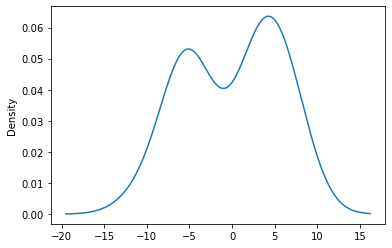

In [9]:
# Before building Linear Regression model 5 assumptions need to be statisfied:
# 1. Multicollinearity
# 2. Normality
# 3. Linearity
# 4. Autocorrelation
# 5. Homoscadasicity

# 1. Multicollinearity check is used to find the correlation between input variable. 
#    Here only one input feature is available so we can proceed to check with normality


# 2. To check normality:
print(ols_mod.resid.skew())
ols_mod.resid.plot(kind = 'kde')

# if the skewness range is between -0.5 to 0.5, then it is said to be normally distributed.
# From the below plot and skew value we can conclude that model statisfying normality.

In [10]:
# To check for Linearity:

# H0 : Part of data is linear
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res = ols_mod, frac = 0.5)

# Pvalue > 0.05. H0 is statisfied. Therefore data is said to be linear.

(2.122962100893773, 0.11910586650135202)

<AxesSubplot:xlabel='Scores'>

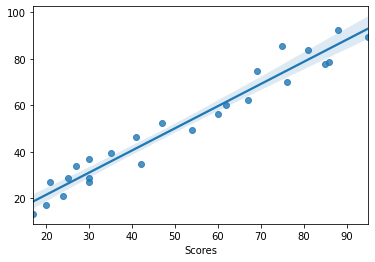

In [11]:
# Checking Linearity through Regplot
ypred = ols_mod.predict(inpc)
sns.regplot(out,ypred)

<AxesSubplot:>

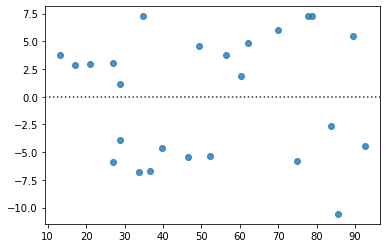

In [12]:
# From the above ols model Durbin_Watson test result we can conclude that model is statisfying Autocorrelation property.

# Durbin-Watson value is 1.460

# To check for Homoscadasicity:

sns.residplot(ypred,ols_mod.resid)


# No clear Conic pattern exit, so it is homoscadasic. to confirm we are going for mathematical test.

In [13]:
# The given data statisfying all the assumptions to build Linera Regression model.

# import Linear Regression along with train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assinging input and output
inp = data['Hours']
out = data['Scores']

# Split data into train test split
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size = 0.2,random_state = 10)


# Building Linear Regression model
lr = LinearRegression()
lr.fit(xtrain.values.reshape(-1,1),ytrain)

ypred = lr.predict(xtest.values.reshape(-1,1))

# Comparin Actual score with Predicted Score:
dt = pd.DataFrame()
dt['Actual'] = ytest
dt['Predicted'] = ypred

dt.head()

,Actual,Predicted
5,20,17.371423
1,47,52.702923
13,42,35.037173
2,27,34.055743
12,41,46.814340


In [14]:
## To test What will be predicted score if a student studies for 9.25 hrs/ day?
hrs = [9.25]
test_pred = lr.predict([hrs])


out_test_pred = pd.DataFrame({'Hrs':hrs,'Predicted_score':test_pred})
out_test_pred

,Hrs,Predicted_score
0,9.25,93.432291


In [15]:
# To evaluate model perfomance:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


print('R-square value is:',r2_score(ytest,ypred))
print('Mean square error is:',mean_squared_error(ytest,ypred))
print('Mean Absolute error is:',mean_absolute_error(ytest,ypred))

R-square value is: 0.6683995499740194
Mean square error is: 34.300750550687425
Mean Absolute error is: 5.632881746692995
